<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2023/blob/main/Unidad_3/04_Backtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

En esta práctica veremos varios ejemplos de exploraciones exhaustivas, es decir, ir encontrando en el espacio de búsqueda elementos que cumplen ciertas características deseadas, una forma común de hacer esto es utilizando la técnica de backtracking (o vuelta hacia atrás), en donde se van buscando elementos con determinadas características en cada paso.

# Ejemplos

## Cambio
Recordando un poco el ejemplo que vimos anteriormente sobre monedas y sus denominaciones, consideremos una lista $L$ de denominaciones posibles para nuestras monedas. Nuestro problema ahora será determinar de cuántas formas se puede formar el número $n$ utilizando dichas denominaciones (suponiendo que tenemos tantas monedas de cada denominación como sea necesario).

Dada la lista $L$, podemos hacer backtracking del siguiente modo:

* Iteramos sobre los elementos de la lista, y definimos una función `count(i, k)` que nos dice de cuántas formas podemos sumar a $k$ con denominaciones $\{L_i, L_{i+1}, \ldots\}$.
* Podemos calcular el valor de `count(i, k)` de manera recursiva:
    * Si $L_i > k$, esto nos dice que la moneda actual (`L[i]`) es más grande que el dinero que queremos partir (`k`), así que nos movemos a la siguiente, i.e. `count(i,k) = count(i+1, k)`.
    * Si $L_i \leq k$, entonces podemos cambiar el dinero con la moneda actual. Entonces, consideramos dos casos: 
        * Sí lo cambiamos y nos quedamos en la misma moneda, `count(i, k-L[i])`
        * No lo hacemos y simplemente pasamos a la siguiente moneda, `count(i+1, k)`
* Los casos base a considerar son:
    * `count(i, 0)`. Queremos cambiar 0 pesos, lo cual se puede hacer de una sola manera: con 0 monedas. Por lo tanto, `count(i, 0) = 1`.
    * `count(i, k)`, con `i` mayor o igual al largo de $L$. En este caso, no tenemos monedas con las cuales cambiar el dinero, por lo cual no hay maneras de hacerlo. Entonces, `count(i, k) = 0`.

Veamos una implementación de este algoritmo:

In [6]:
combs = []

def count(L, k, i=0, out=None):
    if out is None:
        out = []

    if i >= len(L):
        return 0
    if k == 0:
        combs.append(out)
        return 1
    if L[i] > k:
        return count(L, k, i+1, out)
    else:
        temp = out.copy()
        temp.append(L[i])
        return count(L, k-L[i], i, temp) + count(L, k, i+1, out)

L = [2, 8, 4, 6, 13]
print(count(L, 15))
print(combs)

1
[[2, 13]]


## Reinas

Un famoso problema algorítmico es que dado un tablero de ajedrez (de $8 \times 8$), se determine cuántas formas hay de colocar 8 reinas en el tablero de tal manera que no haya dos que se ataquen entre sí. Resolveremos el problema para un tablero de $n\times n$ con $n$ reinas.

Primero, representaremos el tablero como una lista $Q$ de tamaño $n$. La entrada $Q_i$ será un número $0\leq j < n$ que nos dirá la columna en la cual se encuentra la reina de la $i$-ésima fila (de abajo hacia arriba). Por ejemplo, para el siguiente arreglo de reinas:

![chess](chess.png)

Su representación sería `[1, 3, 0, 2]`.

---

Antes de resolver el problema, definimos una función `is_legal` que, dada una lista $Q$ de reinas en la representación anterior, nos diga si podemos colocar una reina en la fila $i$ y la columna $j$. Se asume que dicha fila está vacía. 

Por conveniencia, denotamos a la reina que queremos colocar con $q'$, y a una reina arbitraria en $Q$ con $q$. Su fila y columna se representan con $q_r$ y $q_c$, respectivamente.

* Si $i=0$ (i.e., es la primera fila), el resultado siempre es verdadero.
* Si alguna reina está en la misma columna que la que queremos colocar, el resultado es falso. En otras palabras, si $q_c=q'_c$.
* Si alguna reina está en las diagonales de la que queremos colocar, el resultado es falso. Podemos comprobar esto calculando la distancia horizontal y vertical entre las dos reinas; si ambas son iguales, significa que están en la diagonal. Es decir, si:

$$
|q'_r-q_r| = |q'_c-q_c|
$$

Sin embargo, nótese que como vamos colocando las reinas de abajo hacia arriba, la fila de la reina nueva siempre será mayor. Por lo tanto, podemos reescribir la igualdad anterior como:

$$
q'_r-q_r = |q'_c-q_c|
$$

Despejando, obtenemos:

$$
q'_r = |q'_c-q_c| + q_r
$$

In [8]:
def is_legal(Q, i, j):
    if i == 0:
        return True
    for q_row, q_col in enumerate(Q):
        if q_col is None: # Ya no hay más reinas
            break
        if q_col == j: # Misma columna
            return False
        if i == abs(j - q_col) + q_row: # Diagonal
            return False
    return True

Con esto, podemos resolver el problema utilizando *backtracking*. Para esto, definimos una función `place_queens(Q, r)` que, dada una lista de reinas `Q`, coloque todas las reinas, empezando de la fila `r`. 

* Llamamos a esta función de manera recursiva en cada posición legal que encontremos.
* Si en algún momento `r=n` (i.e., nos pasamos de la última fila) esto nos dice que ya logramos colocar todas las reinas. Por lo tanto, añadimos el arreglo `Q` a la lista de soluciones.

In [9]:
def place_queens(n, row=0, Q=None, sols=None):
    if Q is None:
        Q = [None] * n
        
    if sols is None:
        sols = []
        
    if row == n:
        sols.append(Q)
        return
    
    for col in range(n):
        if is_legal(Q, row, col):
            Q[row] = col
            place_queens(n, row+1, Q.copy(), sols)
    return sols

Lo intentamos con un tablero de $6\times 6$:

In [20]:
queens = place_queens(6)
len(queens)

4

Como extra, definimos una función para graficar una solución:

In [22]:
def plot_queens(Q, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(5, 5))
    
    ticks = list(range(len(Q)+1))
    ax.axis("off")
    ax.axis("equal")
    ax.set_xlim((-0.2, len(Q)+0.2))
    ax.set_ylim((-0.2, len(Q)+0.2))
    
    ax.vlines(ticks, 0, len(Q))
    ax.hlines(ticks, 0, len(Q))
    for q_row, q_col in enumerate(Q):
        circ = plt.Circle((q_col+0.5, q_row+0.5), 0.2, color="k")
        ax.add_patch(circ)

Graficando las soluciones:

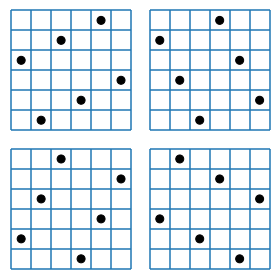

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(4, 4))
for i, sol in enumerate(queens):
    ax = axes[i//2][i%2]
    plot_queens(sol, ax)
fig.tight_layout()

## Suma de subconjuntos

Dado un conjunto de números positivos $S$ y un número $x$, queremos determinar si existe un subconjunto $U\subseteq S$ tal que la suma de los elementos de $U$ es $x$.

Primero, notemos que hay dos casos base: si $x$ es cero, regresamos `verdadero` inmediatamente, ya que la suma del conjunto vacío lo cumple. Por otro lado, si $x<0$, o si $x\neq 0$ pero $S$ es vacío, regresamos `falso`, ya que no existe solución.

Por otro lado, para el caso general, consideremos un elemento $s\in S$ arbitrario. Existe un subconjunto de $S$ que suma a $x$ si y solo si alguna de las dos proposiciones siguientes es verdadera:

* Existe un subconjunto $U\subseteq S$ que suma a $x$ y $s\in U$.
* Existe un subconjunto $U\subseteq S$ que suma a $x$ y $s\notin U$.

El primer caso implica que debe de existir un subconjunto de $S$ que no incluya a $s$ y que sume a $x-s$. En el segundo caso, debe de existir un subconjunto de $S$ que no incluya a $s$, y que sume a $x$. Con esto, podemos reducir el problema a los siguientes dos subproblemas:

* Subconjunto de $S\setminus \{s\}$ que sume a $x-s$.
* Subconjunto de $S\setminus \{s\}$ que sume a $x$.

Así, podemos definir el algoritmo recursivo:

In [ ]:
[11, 2,3 , 5,4]

In [3]:
def subset_sum(S, x):
    if x == 0:
        return True
    elif len(S) == 0 and x > 0:
        return False
    elif x < 0:
        return False
    
    S_minus = S.copy()
    s = S_minus.pop()
    b1 = subset_sum(S_minus, x-s)
    b2 = subset_sum(S_minus, x)
    
    return b1 or b2

Probándolo en un conjunto que sí sabemos que funciona:

In [5]:
S = [1,3,8,4]
x = 15
subset_sum(S, x)

True

Y en uno que no funciona:

In [6]:
S = [1,3,8,4]
x = 2
subset_sum(S, x)

False

Hacer copias de un arreglo es una operación costosa. Es más eficiente pasar el mismo arreglo cada vez, y simplemente cambiar los índices que consideramos:

In [83]:
def subset_sum_index(S, x, r=None):
    if r is None:
        r = len(S)
        
    if x == 0:
        return True
    elif r == 0 or x < 0:
        return False
    
    s = S[r-1]
    b1 = subset_sum_index(S, x-s, r=r-1)
    b2 = subset_sum_index(S, x, r=r-1)
    
    return b1 or b2

In [85]:
S = [1,3,8,4]
x = 15
subset_sum_index(S, x)

True

Comparando los tiempos de ejcución para una lista de enteros grande:

In [102]:
big_list = list(np.random.randint(0, 100, 300))

In [103]:
%%timeit
subset_sum(big_list, x)

5.12 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [104]:
%%timeit
subset_sum_index(big_list, x)

4.66 s ± 128 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Ejercicios

## Ejercicio 1
Dado un conjunto de palabras y un string, describe e implementa un algoritmo que permita contar cuántas oraciones diferentes puede formar la string en cuestión suponiendo que las únicas palabras que existen son las del conjunto inicial. Por ejemplo, si el conjunto de palabras es $\{hola, ola, h\}$, la string "holah" tiene dos posibles interpretaciones, una es "hola h", y la segunda "h ola h". Verifica tu algoritmo con: 

*   Conjunto de palabras `{a, as, tin, tinar, san, sana, atina, arce, ce, atinar}`, y la string "atinarcesanas".
*   Conjunto de palabras `{i, like, ice, and, cream, icecream, man, go, mango}` y la string "ilikeicecreamandmango".

*Ejercicio 1.* Aquí va la descripción de tu algoritmo.

In [1]:
# Aquí va tu código

## Ejercicio 2
Supón que ahora en el ejemplo 1 no se tienen tantas monedas como se deseen. Es decir, se tiene una lista $L$ de denominaciones posibles, y un entero $k$ que nos indica que tenemos exactamente $k$ monedas de cada denominación posible. Describe e implementa un algoritmo que permita contar de cuántas formas se puede formar un entero $n$ con monedas de las denominaciones dadas, y usando a lo más $k$ monedas de cada denominación.

*Ejercicio 2.* Aquí va la descripción de tu algoritmo.

In [ ]:
# Aquí va el código del algoritmo anterior